# Recreate Chris' experiments XLSX

In [1]:
from pandas import read_excel
experiments = read_excel("../experiments.xlsx")

# define the dimensions of difference
base_media = "93465/1/1"  # !!! provide the appropriate permanent KBase ID
columns = 11; rows = 6
date = "10-05-22"
members = ["ecoli", "pf"]
species_abundances = {1:{"ecoli":0, "pf":1},
          2:{"ecoli":1, "pf":50},
          3:{"ecoli":1, "pf":20},
          4:{"ecoli":1, "pf":10},
          5:{"ecoli":1, "pf":3},
          6:{"ecoli":1, "pf":1},
          7:{"ecoli":3, "pf":1},
          8:{"ecoli":10, "pf":1},
          9:{"ecoli":20, "pf":1},
          10:{"ecoli":1, "pf":0},
          11:{"ecoli":0, "pf":0}
          }

carbon_sources = {'cpd00136':"4HB", 'cpd00179':"malt"}

species_identities_rows = {1:{"ecoli":"mRuby"},
                          2:{"ecoli":"ACS"},
                          3:{"ecoli":"mRuby"},
                          4:{"ecoli":"ACS"},
                          5:{"ecoli":"mRuby"},
                          6:{"ecoli":"ACS"}
                          }

row_concentrations = {'*':{'cpd00179':[5, 0.5]},
                      1:{"cpd00136":[0, 0]},
                      2:{"cpd00136":[0.5, 0.05]},
                      3:{"cpd00136":[1, 0.1]},
                      4:{"cpd00136":[2, 0.2]},
                      5:{"cpd00136":[4, 0.4]},
                      6:{"cpd00136":[8, 0.8]}
                     }

# construct the DataFrame
from pandas import DataFrame #, set_option
constructed_experiments = DataFrame()
experiment_prefix = "Y"
constructed_experiments["short_code"] = [f"{experiment_prefix}{x+1}" for x in experiments.index]
constructed_experiments["base_media"] = [base_media]*(columns*rows)

## define the strains column
strains, additional_compounds, experiment_ids = [], [], []
trial_name_conversion = {}
count = 1
for row in range(1, rows+1):
    trial_letter = chr(ord("A")+row)
    composition = {}
    row_conc = []
    if '*' in row_concentrations:
        for met in row_concentrations['*']:
            row_conc.append(':'.join([met, str(row_concentrations['*'][met][0]), str(row_concentrations['*'][met][1])]))
    if row in row_concentrations:
        for met in row_concentrations[row]:
            if row_concentrations[row][met][0] > 0:
                row_conc.append(':'.join([met, str(row_concentrations[row][met][0]), str(row_concentrations[row][met][1])]))
    row_concentration = ';'.join(row_conc)
    for col in range(1, columns+1):
        additional_compounds.append(row_concentration)
        experiment_id = []
        for member in members:
            composition[member] = [member, f"r{species_abundances[col][member]}"]
            if member in species_identities_rows[row]:
                composition[member][0] += f"_{species_identities_rows[row][member]}"
            if int(composition[member][1][1:]) != 0:
                experiment_id.append(f"{composition[member][1]}_{composition[member][0]}")
            composition[member] = ':'.join(composition[member])
        strains.append(';'.join(composition[member] for member in members))
        for r in row_conc:
            met, init, end = r.split(':')
            experiment_id.append(f"{init}_{carbon_sources[met]}")
        experiment_id = '-'.join(experiment_id)
        experiment_ids.append(experiment_id)
        trial_name_conversion[trial_letter+str(col+1)] = [experiment_prefix+str(count), experiment_id]
        count +=1

constructed_experiments["additional_compounds"] = additional_compounds
constructed_experiments["strains"] = strains
constructed_experiments.insert(0,"experiment_ids", experiment_ids) 
constructed_experiments["date"] = [date]*(columns*rows)
# set_option('display.max_rows', None)
display(constructed_experiments)
# constructed_experiments.to_csv("experimental_metadata.csv")

,experiment_ids,short_code,base_media,additional_compounds,strains,date
0,r1_pf-5_malt,Y1,93465/1/1,cpd00179:5:0.5,ecoli_mRuby:r0;pf:r1,10-05-22
1,r1_ecoli_mRuby-r50_pf-5_malt,Y2,93465/1/1,cpd00179:5:0.5,ecoli_mRuby:r1;pf:r50,10-05-22
2,r1_ecoli_mRuby-r20_pf-5_malt,Y3,93465/1/1,cpd00179:5:0.5,ecoli_mRuby:r1;pf:r20,10-05-22
3,r1_ecoli_mRuby-r10_pf-5_malt,Y4,93465/1/1,cpd00179:5:0.5,ecoli_mRuby:r1;pf:r10,10-05-22
4,r1_ecoli_mRuby-r3_pf-5_malt,Y5,93465/1/1,cpd00179:5:0.5,ecoli_mRuby:r1;pf:r3,10-05-22
...,...,...,...,...,...,...
61,r3_ecoli_ACS-r1_pf-5_malt-8_4HB,Y62,93465/1/1,cpd00179:5:0.5;cpd00136:8:0.8,ecoli_ACS:r3;pf:r1,10-05-22
62,r10_ecoli_ACS-r1_pf-5_malt-8_4HB,Y63,93465/1/1,cpd00179:5:0.5;cpd00136:8:0.8,ecoli_ACS:r10;pf:r1,10-05-22
63,r20_ecoli_ACS-r1_pf-5_malt-8_4HB,Y64,93465/1/1,cpd00179:5:0.5;cpd00136:8:0.8,ecoli_ACS:r20;pf:r1,10-05-22
64,r1_ecoli_ACS-5_malt-8_4HB,Y65,93465/1/1,cpd00179:5:0.5;cpd00136:8:0.8,ecoli_ACS:r1;pf:r0,10-05-22


In [2]:
import json
with open("trial_conversions.json", 'w') as out:
    json.dump(trial_name_conversion, out, indent=3)

# Chris' growth_data XLSX 

In [3]:
from pandas import ExcelFile

def isnumber(string):
    try:
        float(string)
    except:
        return False
    return True

dataframes = {}
raw_data = ExcelFile("../../Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx")
worksheets = {"Raw OD(590)": "OD", "mNeonGreen": "pf", "mRuby": "ecoli"}
for org_sheet, name in worksheets.items():
    sheet = org_sheet.replace(' ', '_')
    dataframes[sheet] = raw_data.parse(org_sheet)
    dataframes[sheet].columns = dataframes[sheet].iloc[6]
    dataframes[sheet] = dataframes[sheet].drop(dataframes[sheet].index[:7])

numerical_columns = []
dfs = {}
for sheet, df in dataframes.items():
    times, values, experiments_list, short_codes = [], [], [], [] 
    for trial in set(df["Well"]):
        for index, row in df[df["Well"] == trial].iterrows():
            if not numerical_columns:
                numerical_columns = [x for x in row.index if isnumber(x)]
            if row["Cycle #"] == "Time (s)":
                times.extend([row[x] for x in numerical_columns])
                experiments_list.extend([trial_name_conversion[trial][1]]*len(numerical_columns))  # arbitrarily placed in one conditional block to prevent doubling the contents
                short_codes.extend([trial_name_conversion[trial][0]]*len(numerical_columns))  # arbitrarily placed in one conditional block to prevent doubling the contents
            if row["Cycle #"] == "Result":
                values.extend([row[x] for x in numerical_columns])
                
    dfs[sheet] = DataFrame({"Time (s)":times, "values":values, "strain": [sheet]*len(short_codes), "experiment_IDs":experiments_list, "short_codes": short_codes})
    dfs[sheet].index = dfs[sheet]["short_codes"]
    del dfs[sheet]["short_codes"]
    # dfs[sheet].to_csv(sheet+".csv")

In [4]:
for sheet, df in dfs.items():
    display(df)

,Time (s),values,strain,experiment_IDs
short_codes,,,,
Y36,26.956,0.068350,Raw_OD(590),r1_ecoli_ACS-r20_pf-5_malt-2_4HB
Y36,622.063,0.070741,Raw_OD(590),r1_ecoli_ACS-r20_pf-5_malt-2_4HB
Y36,1213.947,0.068737,Raw_OD(590),r1_ecoli_ACS-r20_pf-5_malt-2_4HB
Y36,1806.411,0.067231,Raw_OD(590),r1_ecoli_ACS-r20_pf-5_malt-2_4HB
Y36,2398.902,0.068352,Raw_OD(590),r1_ecoli_ACS-r20_pf-5_malt-2_4HB
...,...,...,...,...
Y39,95416.715,1.147774,Raw_OD(590),r1_ecoli_ACS-r1_pf-5_malt-2_4HB
Y39,96009.777,1.152197,Raw_OD(590),r1_ecoli_ACS-r1_pf-5_malt-2_4HB
Y39,96601.652,1.147517,Raw_OD(590),r1_ecoli_ACS-r1_pf-5_malt-2_4HB


,Time (s),values,strain,experiment_IDs
short_codes,,,,
Y36,8.625,23599.0,mNeonGreen,r1_ecoli_ACS-r20_pf-5_malt-2_4HB
Y36,605.277,23527.0,mNeonGreen,r1_ecoli_ACS-r20_pf-5_malt-2_4HB
Y36,1197.152,23317.0,mNeonGreen,r1_ecoli_ACS-r20_pf-5_malt-2_4HB
Y36,1789.625,23002.0,mNeonGreen,r1_ecoli_ACS-r20_pf-5_malt-2_4HB
Y36,2382.116,23072.0,mNeonGreen,r1_ecoli_ACS-r20_pf-5_malt-2_4HB
...,...,...,...,...
Y39,95399.652,178785.0,mNeonGreen,r1_ecoli_ACS-r1_pf-5_malt-2_4HB
Y39,95992.714,180879.0,mNeonGreen,r1_ecoli_ACS-r1_pf-5_malt-2_4HB
Y39,96584.545,180758.0,mNeonGreen,r1_ecoli_ACS-r1_pf-5_malt-2_4HB


,Time (s),values,strain,experiment_IDs
short_codes,,,,
Y36,8.625,692.0,mRuby,r1_ecoli_ACS-r20_pf-5_malt-2_4HB
Y36,605.294,717.0,mRuby,r1_ecoli_ACS-r20_pf-5_malt-2_4HB
Y36,1197.161,658.0,mRuby,r1_ecoli_ACS-r20_pf-5_malt-2_4HB
Y36,1789.678,736.0,mRuby,r1_ecoli_ACS-r20_pf-5_malt-2_4HB
Y36,2382.134,711.0,mRuby,r1_ecoli_ACS-r20_pf-5_malt-2_4HB
...,...,...,...,...
Y39,95399.794,273846.0,mRuby,r1_ecoli_ACS-r1_pf-5_malt-2_4HB
Y39,95999.991,270150.0,mRuby,r1_ecoli_ACS-r1_pf-5_malt-2_4HB
Y39,96591.375,272358.0,mRuby,r1_ecoli_ACS-r1_pf-5_malt-2_4HB


# Test standardize()

In [1]:
# define the environment path 
import os
# local_cobrakbase_path = os.path.join('/Users/afreiburger/Documents')
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

# import the models
import cobrakbase
# with open("/Users/afreiburger/Documents/kbase_token.txt") as token_file:
with open("C:/Users/Andrew Freiburger/Documents/Argonne/kbase_token.txt") as token_file:
    kbase_api = cobrakbase.KBaseAPI(token_file.readline())
    
import warnings
warnings.filterwarnings(action='once')

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


cobrakbase 0.2.8


In [2]:
%run ../datastandardization.py
growth_data_path="../../Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = DataStandardization.process_jeffs_data(
    base_media=kbase_api.get_from_ws("93465/19/1"),
    community_members = {
        kbase_api.get_from_ws("iML1515",76994): {
            'name': 'ecoli', 
            'phenotypes': {#'acetate': kbase_api.get_from_ws('93465/13/1'), 
                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        },
        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
            'name': 'pf',
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
            }
        }
    },
    signal_csv_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = {
        1:{"ecoli":0, "pf":1},
        2:{"ecoli":1, "pf":50},
        3:{"ecoli":1, "pf":20},
        4:{"ecoli":1, "pf":10},
        5:{"ecoli":1, "pf":3},
        6:{"ecoli":1, "pf":1},
        7:{"ecoli":3, "pf":1},
        8:{"ecoli":10, "pf":1},
        9:{"ecoli":20, "pf":1},
        10:{"ecoli":1, "pf":0},
        11:{"ecoli":0, "pf":0}
      },
    carbon_conc_series = {'rows': {
        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
    }},
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"ecoli":"mRuby"},
        4:{"ecoli":"ACS"},
        5:{"ecoli":"mRuby"},
        6:{"ecoli":"ACS"}
    }
)

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:261: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty

The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B2', 'B3', '

In [3]:
# for df in growth_dfs.values():
display(experimental_metadata)
display(growth_df)
print(standardized_carbon_conc)

,trial_IDs,short_code,base_media,additional_compounds,strains,date
0,r1_pf-5_ecoli,A1,93465/19/1,cpd00179:5:5,ecoli_mRuby:r0;pf:r1,29-4-22
1,r1_ecoli_mRuby-r50_pf-5_ecoli,A2,93465/19/1,cpd00179:5:5,ecoli_mRuby:r1;pf:r50,29-4-22
2,r1_ecoli_mRuby-r20_pf-5_ecoli,A3,93465/19/1,cpd00179:5:5,ecoli_mRuby:r1;pf:r20,29-4-22
3,r1_ecoli_mRuby-r10_pf-5_ecoli,A4,93465/19/1,cpd00179:5:5,ecoli_mRuby:r1;pf:r10,29-4-22
4,r1_ecoli_mRuby-r3_pf-5_ecoli,A5,93465/19/1,cpd00179:5:5,ecoli_mRuby:r1;pf:r3,29-4-22
...,...,...,...,...,...,...
61,r3_ecoli_ACS-r1_pf-4_pf-5_ecoli,A62,93465/19/1,cpd00136:4:4;cpd00179:5:5,ecoli_ACS:r3;pf:r1,29-4-22
62,r10_ecoli_ACS-r1_pf-4_pf-5_ecoli,A63,93465/19/1,cpd00136:4:4;cpd00179:5:5,ecoli_ACS:r10;pf:r1,29-4-22
63,r20_ecoli_ACS-r1_pf-4_pf-5_ecoli,A64,93465/19/1,cpd00136:4:4;cpd00179:5:5,ecoli_ACS:r20;pf:r1,29-4-22
64,r1_ecoli_ACS-4_pf-5_ecoli,A65,93465/19/1,cpd00136:4:4;cpd00179:5:5,ecoli_ACS:r1;pf:r0,29-4-22


,trial_IDs,Time (s),Raw_OD(590),mNeonGreen,mRuby
short_codes,,,,,
A3,r1_ecoli_mRuby-r20_pf-5_ecoli,0.717333,0.067329,23932.0,745.0
A3,r1_ecoli_mRuby-r20_pf-5_ecoli,596.851000,0.069574,23739.0,659.0
A3,r1_ecoli_mRuby-r20_pf-5_ecoli,1188.729000,0.064329,23757.0,679.0
A3,r1_ecoli_mRuby-r20_pf-5_ecoli,1781.208333,0.064587,23516.0,695.0
A3,r1_ecoli_mRuby-r20_pf-5_ecoli,2373.693333,0.063576,23090.0,717.0
...,...,...,...,...,...
A3,r1_ecoli_mRuby-r20_pf-5_ecoli,95393.092333,1.189457,77108.0,99157.0
A3,r1_ecoli_mRuby-r20_pf-5_ecoli,95988.542000,1.186603,77162.0,101470.0
A3,r1_ecoli_mRuby-r20_pf-5_ecoli,96580.243667,1.187866,76780.0,106493.0


{'cpd00136': {'A1': 0, 'A2': 0, 'A3': 0, 'A4': 0, 'A5': 0, 'A6': 0, 'A7': 0, 'A8': 0, 'A9': 0, 'A10': 0, 'A11': 0, 'A12': 0, 'A13': 0, 'A14': 0, 'A15': 0, 'A16': 0, 'A17': 0, 'A18': 0, 'A19': 0, 'A20': 0, 'A21': 0, 'A22': 0, 'A23': 1, 'A24': 1, 'A25': 1, 'A26': 1, 'A27': 1, 'A28': 1, 'A29': 1, 'A30': 1, 'A31': 1, 'A32': 1, 'A33': 1, 'A34': 1, 'A35': 1, 'A36': 1, 'A37': 1, 'A38': 1, 'A39': 1, 'A40': 1, 'A41': 1, 'A42': 1, 'A43': 1, 'A44': 1, 'A45': 4, 'A46': 4, 'A47': 4, 'A48': 4, 'A49': 4, 'A50': 4, 'A51': 4, 'A52': 4, 'A53': 4, 'A54': 4, 'A55': 4, 'A56': 4, 'A57': 4, 'A58': 4, 'A59': 4, 'A60': 4, 'A61': 4, 'A62': 4, 'A63': 4, 'A64': 4, 'A65': 4, 'A66': 4}, 'cpd00179': {'A1': 5, 'A2': 5, 'A3': 5, 'A4': 5, 'A5': 5, 'A6': 5, 'A7': 5, 'A8': 5, 'A9': 5, 'A10': 5, 'A11': 5, 'A12': 5, 'A13': 5, 'A14': 5, 'A15': 5, 'A16': 5, 'A17': 5, 'A18': 5, 'A19': 5, 'A20': 5, 'A21': 5, 'A22': 5, 'A23': 5, 'A24': 5, 'A25': 5, 'A26': 5, 'A27': 5, 'A28': 5, 'A29': 5, 'A30': 5, 'A31': 5, 'A32': 5, 'A33': 5, 

# test the standardized CommFitting

In [69]:
%run ../../../mscommfitting_standardized.py

commfit = MSCommFitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
commfit.define_problem(parameters={
                                    'v':.3,
                                    'cvmin': 100,
                                    'bcv': 100,
                                    'diffpos': 100,
                                    'diffneg': 100
                                    }, 
                         # export_zip_name='for_michaelis_menten.zip', 
                         # data_timesteps = {"A3":list(range(10))},
                         final_rel_c12_conc = 0.1, 
                         mets_to_track = ["cpd00179","cpd00029","cpd00136"],
                         zero_start=["cpd00029"])

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting_standardized.py:81: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.007552083333333333 min
Done with the dbc & diffc loop: 0.00390625 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.09583333333333334 min
Done exporting the content: 0.015364583333333333 min


graph_0
{'content': 'all_biomass',
 'experimental_data': True,
 'phenotype': {'malt', '4HB', 'stationary', 'acetate'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'A3'}
experimental_data
experimental_data
experimental_data


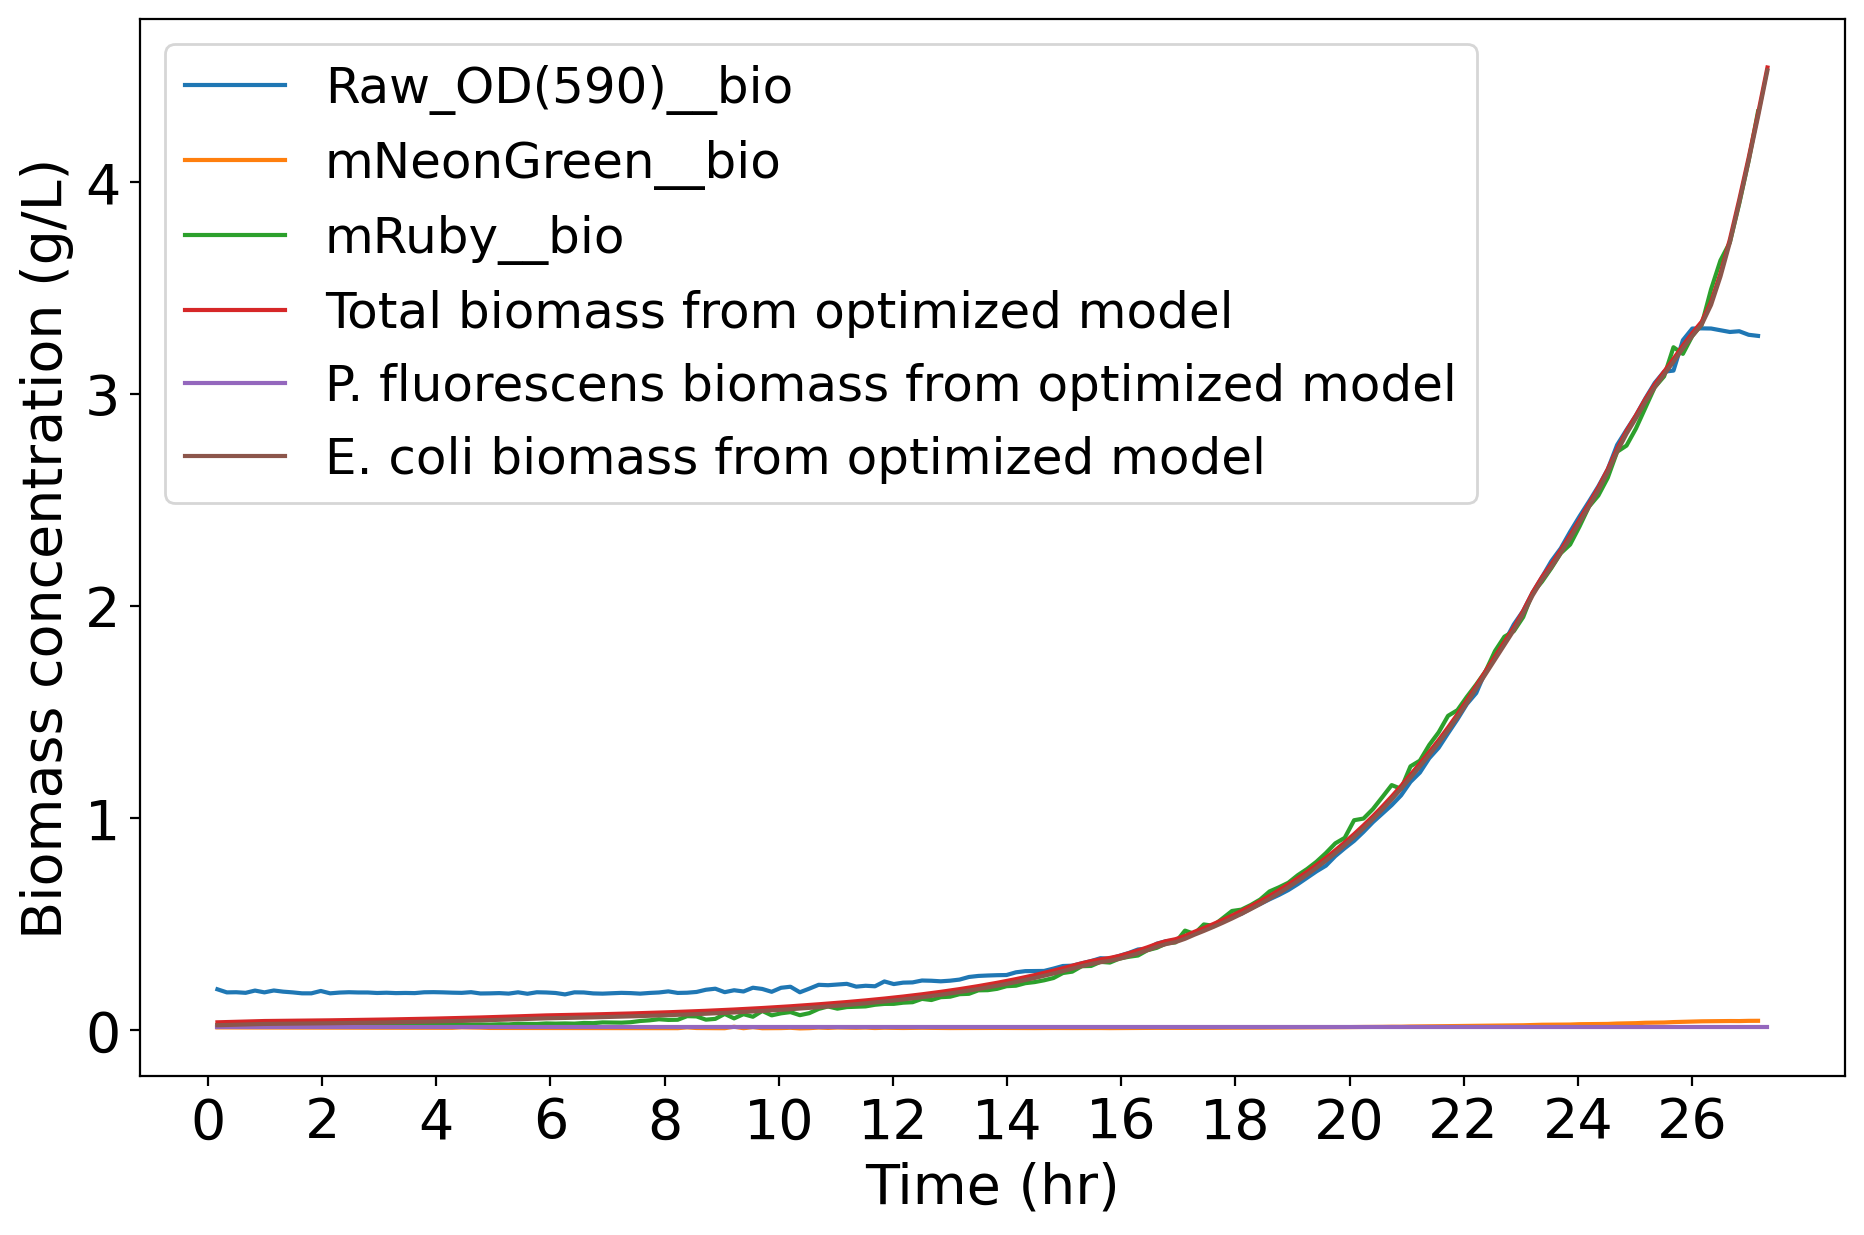

In [71]:
commfit.compute(graphs = [
    {
        'trial':'A3',
        'content': 'all_biomass',
        'experimental_data': True
    }
], publishing=True)